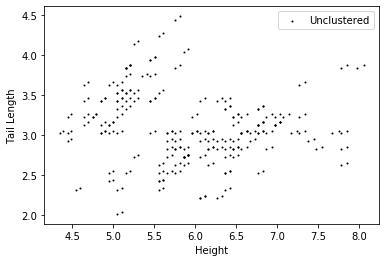

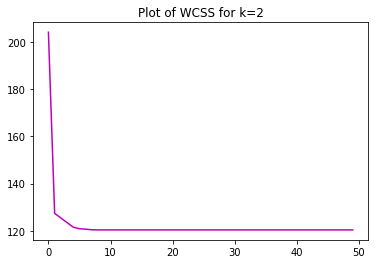

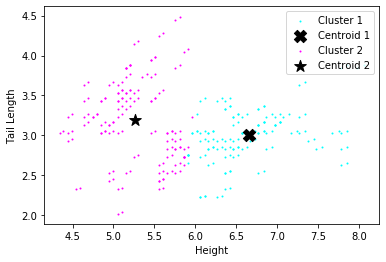

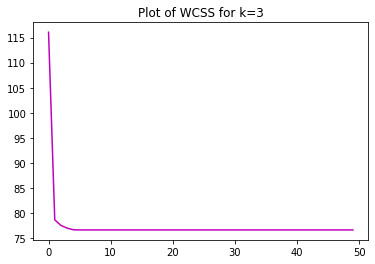

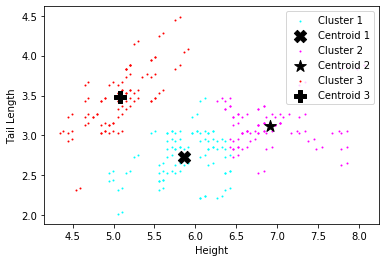

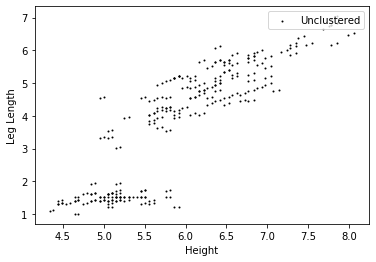

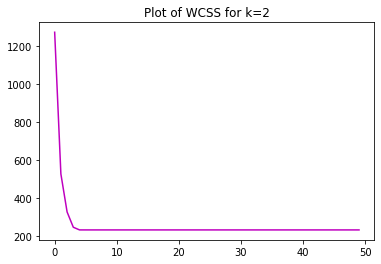

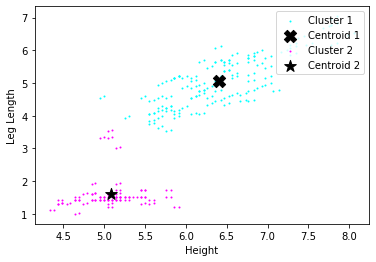

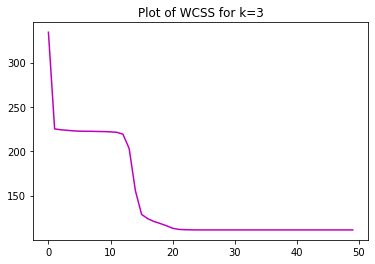

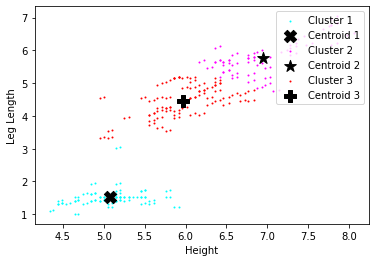

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random as rd

def getData():
    # load the data and return
    file = pd.read_csv('dogdataset.csv')
    return file

def compute_euclidean_distance(vec_1, vec_2):
    #work out the euclidean distance between vec1 and vec2 and return
    distance=np.sum(np.square(vec_1-vec_2),axis=1)
    return distance

#init the centroids randomly
def initialise_centroids(dataset, k):
    #create empty array for centroids
    centroids= []

    #randomly assigns the centroids and adds to array
    for cluster in range(k):
        rand=rd.randint(0,dataset.shape[0]-1)
        centroids.append(dataset[rand])
    
    #return centroid array
    return centroids

def GetWCSS(centroids, tmpOut, k):
    #hold current score
    wcss = 0
    
    #itterate through each cluster
    for cluster in range(k):
        dataInCluster = tmpOut[cluster+1]
        
        #for each point in the cluster add its distance to the total
        for data in dataInCluster:
            wcss += np.sum((data - centroids[cluster]) ** 2)
            
    #return itterations score
    return wcss

def kmeans(dataset, k):   
    #init the centroids
    Centroids = initialise_centroids(dataset,k)
    
    # Set up the WCSS/iteration plot
    plt.figure()
    WCSSContainer = []
    
    #init a dictionary to hold the output
    Output={}
    
    #run kmeans 50 times to try to find convergence
    for itter in range(50):
        #get an array to hold the distances and resize
        euclidianDistance=np.array([]).reshape(dataset.shape[0],0)
        
        #get the distances for each cluster
        for cluster in range(k):
            euclidianDistance=np.c_[euclidianDistance,compute_euclidean_distance(dataset,Centroids[cluster])]
        
        #get cluster indexes
        tmp=np.argmin(euclidianDistance,axis=1)+1
        
        #initialise temp output
        tmpOut={}
        
        #clear the arrays for each cluster and resize
        for cluster in range(k):
            tmpOut[cluster+1]=np.array([]).reshape(2,0)
        
        #assigns the points
        for i in range(dataset.shape[0]):
            tmpOut[tmp[i]]=np.c_[tmpOut[tmp[i]],dataset[i]]
        
        #transpose each cluser
        for cluster in range(k):
            tmpOut[cluster+1]=tmpOut[cluster+1].T
        
        #Get WCSS score for this itteration and add to array
        wcssValue = GetWCSS(Centroids, tmpOut, k)
        
        #add itteration to main array
        WCSSContainer.append(wcssValue)

        #get mean of clusters and assign new centroids
        for cluster in range(k):
            Centroids[cluster]=np.mean(tmpOut[cluster+1],axis=0)
            
        #assign output
        Output=tmpOut
        
        #repeat
    
    #Plot WCSS
    plt.plot([i for i in range(len(WCSSContainer))] , WCSSContainer,c='m')
    plt.title("Plot of WCSS for k={}".format(k))
    plt.show()
    
    #Return Centroids and Points
    return Centroids, Output

#Plot the unclustered data
def scatter(tmp, text): 
    plt.figure()
    plt.scatter(tmp[:,0],tmp[:,1],s=1,c='k',label='Unclustered')
    plt.xlabel('Height')
    plt.ylabel(text)
    plt.legend(loc = 'upper right')
    plt.show()

#Plot the clustered data
def plot(o, c, y, k):
    plt.figure()
    for cluster in range(k):
        plt.scatter(o[cluster+1][:,0],o[cluster+1][:,1],s=1,c=colour[cluster],label=labels[cluster])
        plt.scatter(c[cluster][0],c[cluster][1], marker = shape[cluster],s=150,c="k", label="Centroid {}".format(cluster+1))
    plt.xlabel('Height')
    plt.ylabel(y)
    plt.legend(loc = 'upper right')
    plt.show()

#set the colour, shapes and labels used by the graphs
colour=['cyan','magenta','red']
shape=["X","*","P"]
labels=['Cluster 1','Cluster 2','Cluster 3']

#get the data
file = getData()

#get the requested columns
dataset1 = file.iloc[:, [0, 1]].values
dataset2 = file.iloc[:, [0, 2]].values

#plot dataset 1
#unclustered
scatter(dataset1,'Tail Length')
#plot k=2
answer1_2_c, answer1_2_o = kmeans(dataset1, 2)
plot(answer1_2_o, answer1_2_c, 'Tail Length', 2)

#plot k=3
answer1_3_c, answer1_3_o = kmeans(dataset1, 3)
plot(answer1_3_o, answer1_3_c, 'Tail Length', 3)

#plot dataset 2
#unclustered
scatter(dataset2,'Leg Length')
#plot k=2
answer2_2_c, answer2_2_o = kmeans(dataset2, 2) 
plot(answer2_2_o, answer2_2_c, 'Leg Length', 2)

#plot k=3
answer2_3_c, answer2_3_o = kmeans(dataset2, 3)
plot(answer2_3_o, answer2_3_c, 'Leg Length', 3)